In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [133]:
data = pd.read_csv('./banana_quality.csv')

In [134]:
data.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [135]:
data.tail(10)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7990,-1.468650,0.258104,-1.733331,0.939175,0.302571,-1.382287,3.830090,Bad
7991,-4.559045,-0.449785,1.895221,2.126339,-4.577347,2.585295,1.015110,Bad
7992,-3.901210,0.364839,2.004397,1.809546,-1.106952,-1.586317,1.896975,Bad
7993,-0.908573,0.303526,-1.448441,1.275473,0.311950,-1.815395,2.371496,Bad
7994,-1.409043,0.126115,-2.169534,1.711242,0.115379,-1.146596,2.834771,Bad
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


In [136]:
nan_count = data.isnull().sum()
nan_count

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [137]:
final_data = data.dropna()

In [138]:
final_data.tail(10)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7990,-1.468650,0.258104,-1.733331,0.939175,0.302571,-1.382287,3.830090,Bad
7991,-4.559045,-0.449785,1.895221,2.126339,-4.577347,2.585295,1.015110,Bad
7992,-3.901210,0.364839,2.004397,1.809546,-1.106952,-1.586317,1.896975,Bad
7993,-0.908573,0.303526,-1.448441,1.275473,0.311950,-1.815395,2.371496,Bad
7994,-1.409043,0.126115,-2.169534,1.711242,0.115379,-1.146596,2.834771,Bad
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


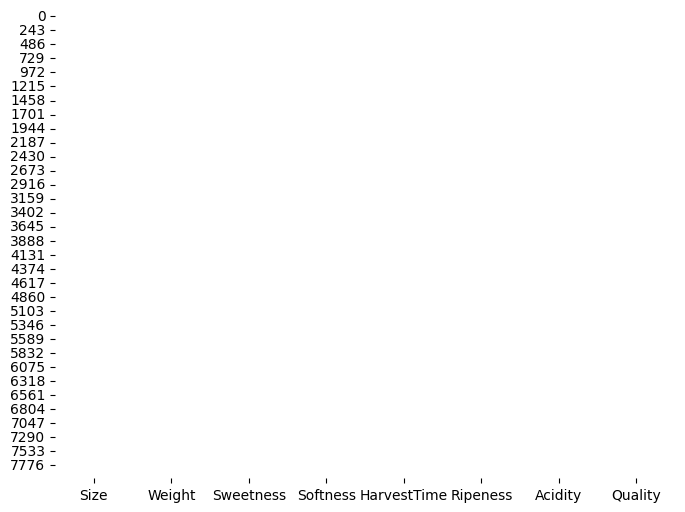

In [139]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='binary')
plt.show()

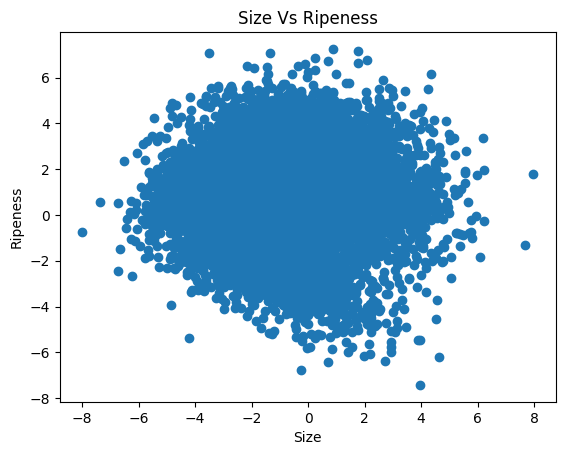

In [140]:
plt.scatter(final_data["Size"], final_data["Ripeness"],marker='o')
plt.xlabel('Size')
plt.ylabel('Ripeness')
plt.title('Size Vs Ripeness')
plt.show()


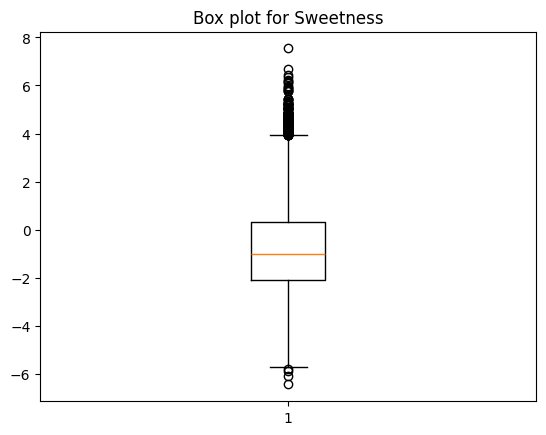

In [141]:
plt.boxplot(final_data['Sweetness'])
plt.title('Box plot for Sweetness')
plt.show()

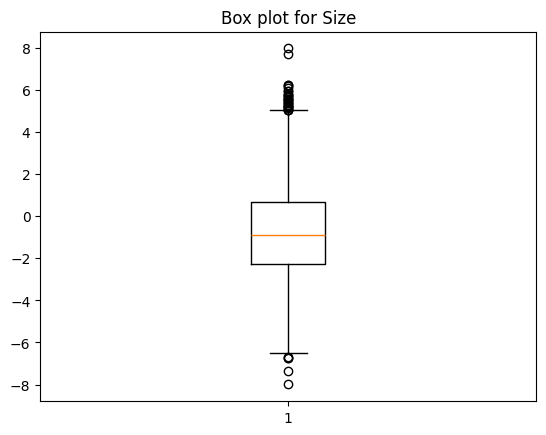

In [142]:
plt.boxplot(final_data['Size'])
plt.title('Box plot for Size')
plt.show()

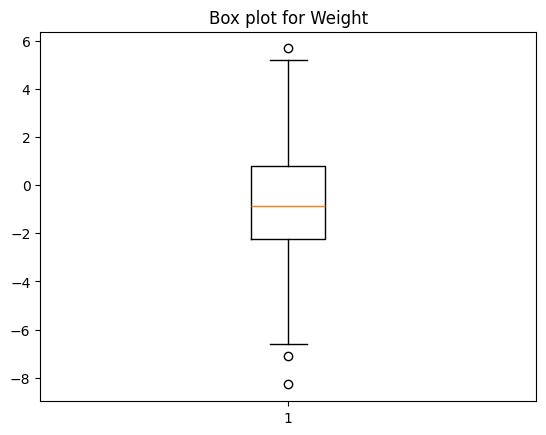

In [143]:
plt.boxplot(final_data['Weight'])
plt.title('Box plot for Weight')
plt.show()

In [144]:
for column_name in ['Weight', 'Size', 'Sweetness', 'Ripeness', 'Acidity']:
# Assuming data is your DataFrame and 'column_name' is the column for which you want to check outliers
    Q1 = final_data[column_name].quantile(0.25)
    Q3 = final_data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the boundary for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get the number of outliers
    outliers = final_data[(final_data[column_name] < lower_bound) |
                    (final_data[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f'There are {num_outliers} outliers in {column_name}.')


There are 3 outliers in Weight.
There are 36 outliers in Size.
There are 178 outliers in Sweetness.
There are 58 outliers in Ripeness.
There are 17 outliers in Acidity.


In [145]:
final_data[f'Adjusted_{column_name}'] = np.where((data[column_name] < lower_bound) | (data[column_name] > upper_bound), np.nan, data[column_name])

# Calculate the mean of the non-outlier values
mean = final_data[f'Adjusted_{column_name}'].mean()

# Replace the NaNs in the 'Adjusted' column with the mean
final_data[f'Adjusted_{column_name}'].fillna(mean)
data = final_data.drop(columns=column_name, axis = 1)

<Axes: xlabel='Quality', ylabel='count'>

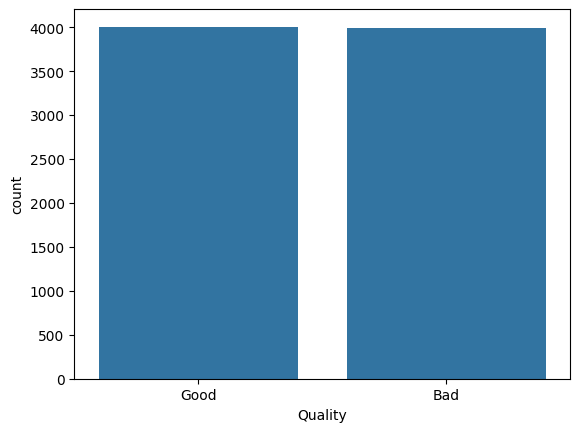

In [146]:
sns.countplot(x='Quality', data=final_data)

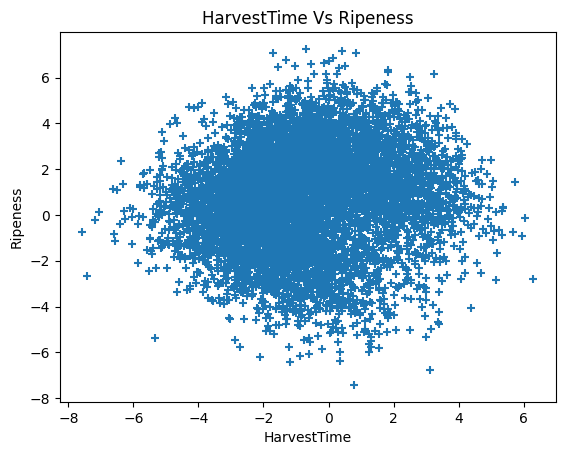

In [147]:
plt.scatter(final_data["HarvestTime"], final_data["Ripeness"],marker='+')
plt.xlabel('HarvestTime')
plt.ylabel('Ripeness')
plt.title('HarvestTime Vs Ripeness')
plt.show()


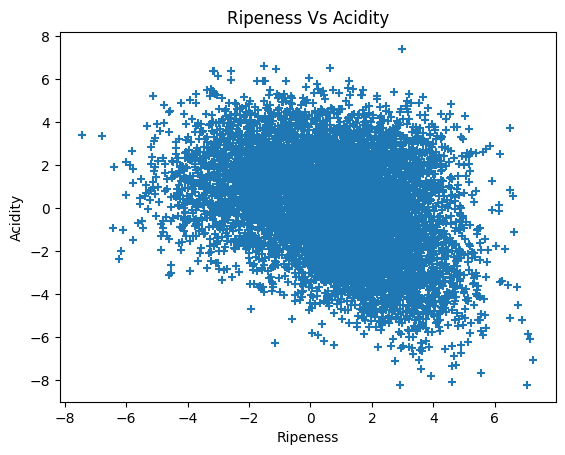

In [148]:
plt.scatter(final_data["Ripeness"], final_data["Acidity"],marker='+')
plt.xlabel('Ripeness')
plt.ylabel('Acidity')
plt.title('Ripeness Vs Acidity')
plt.show()


In [149]:
for column_name in ['Weight', 'Size', 'Sweetness', 'Ripeness', 'Acidity']:
# Assuming data is your DataFrame and 'column_name' is the column for which you want to check outliers
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the boundary for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get the number of outliers
    outliers = data[(data[column_name] < lower_bound) |
                    (data[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f'There are {num_outliers} outliers for {column_name}.')
    data[f'Adjusted_{column_name}'] = np.where((data[column_name] < lower_bound) | (
    data[column_name] > upper_bound), np.nan, data[column_name])

# Calculate the mean of the non-outlier values
    mean = data[f'Adjusted_{column_name}'].mean()

# Replace the NaNs in the 'Adjusted' column with the mean
    data[f'Adjusted_{column_name}'].fillna(mean, inplace=True)
    data = data.drop(columns=column_name, axis = 1)

There are 3 outliers for Weight.
There are 36 outliers for Size.
There are 178 outliers for Sweetness.
There are 58 outliers for Ripeness.


KeyError: 'Acidity'